In [1]:
import pandas as pd
import numpy as np
import re
from wordcloud import WordCloud, ImageColorGenerator

In [2]:
#데이터 로드
df = pd.read_csv('mid_sum1.csv')
df

,STAR,REVIEW,DATE
0,5.0,It is located in the basement of Lotte World ...,a day ago
1,5.0,Aquarium is always fun Until the end with a s...,2 days ago
2,3.0,Its honestly disappointing compared to the sc...,3 days ago
3,5.0,Just awesome with beluga,4 days ago
4,5.0,It was nice to walk around coolly in the summ...,4 days ago
...,...,...,...
8069,5.0,It is conveniently connected directly from Exi...,8 months ago
8070,5.0,Very beautiful,8 months ago
8071,4.0,Good Best department store,8 months ago
8072,5.0,visit with parents I have to make a lot of mon...,8 months ago


In [3]:
df=df.dropna()

In [4]:
df.isnull().sum()

STAR      0
REVIEW    0
DATE      0
dtype: int64

In [5]:
from nltk.stem import LancasterStemmer
stemmer = LancasterStemmer()
#워드카운트를 위해 String 형태로 전환
review_str= ' '.join(list(df['REVIEW'])).lower()
review_str[:500]
for i in review_str:
    i=stemmer.stem(i)

In [6]:
#필요한 패키지 임포트 및 다운로드
import nltk
nltk.download()
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize 

nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\jiu14\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\jiu14\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\jiu14\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [7]:
#불용어 확인
stopwords.words('english')[:10]

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]

In [8]:
#불용어 추가
stop_words = set(stopwords.words('english'))
add_stop_words = ["'", ",", "'s", ":", ".", "?", "!","(",")","n't","korea","korean","good","like","awesome","perfect","nice","well","expensive"]
for word in add_stop_words:
    stop_words.add(word)

In [9]:
#리뷰들을 토큰화 & 불용어제거
word_tokens = word_tokenize(review_str)
review_list = [] #리스트 형태 하나와 
review = '' #스트링 형태 하나를 만듦.
#for w in word_tokens: 
for w in word_tokens:
    if w not in stop_words: 
        review_list.append(w)
        review = review + ' ' + w

In [10]:
print("불용어 개수 : ", len(stop_words))
print("불용어 처리 전 : ", len(review_str))
print("불용어 처리 후 : ", len(review_list))
print("불용어 처리로 약 ", round(100-len(review_list)/len(review_str)*100, 1),"% 감소")

불용어 개수 :  198
불용어 처리 전 :  2259363
불용어 처리 후 :  206115
불용어 처리로 약  90.9 % 감소


In [11]:
#stemmer = nltk.stem.SnowballStemmer('english')
 #   stemmer_words = [stemmer.stem(word) for word in no_stops]

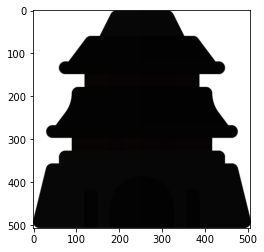

In [12]:
#마스크이미지 업로드 & 워드클라우드 만들기
from PIL import Image
from collections import Counter
import matplotlib.pyplot as plt
mask = np.array(Image.open("ndm.png"))
plt.imshow(mask)

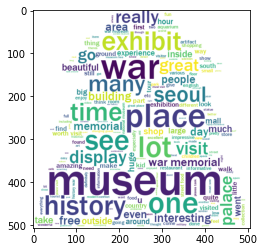

In [13]:
wc_review = WordCloud(background_color='white', font_path='framd.ttf',mask=mask).generate(review)
plt.imshow(wc_review)

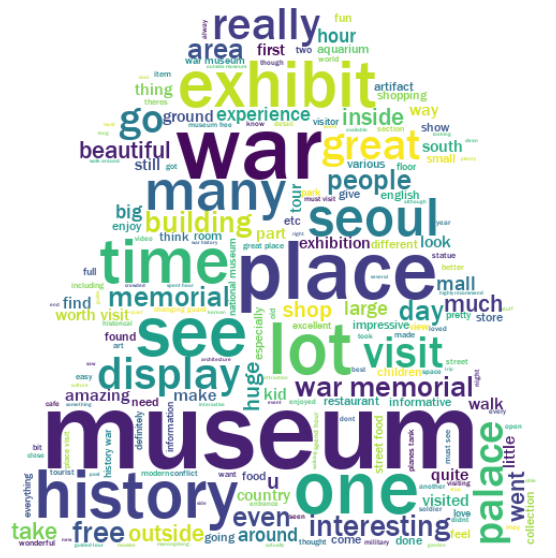

In [14]:
fig = plt.figure(figsize=(10, 10))#figsize=(10, 10))
plt.imshow(wc_review,interpolation="bilinear")#interpolation="bilinear"
plt.axis("off")
plt.show()

In [15]:
wc_review.to_file("wordcloud.png")

In [16]:
#단어빈도수 확인
review_30 = sorted(Counter(review_list).items(), reverse=True, key = lambda item:item[1])
review_30 = pd.DataFrame.from_dict(review_30)
review_30.columns = ['word', 'count']
review_30[:30].to_csv("word30.csv") #해당 데이터를 csv 파일로 저장.

In [17]:
review_30[:30]

,word,count
0,museum,4187
1,war,3397
2,history,2390
3,place,2279
4,visit,1888
5,see,1859
6,free,1563
7,time,1495
8,also,1424
9,many,1291


In [18]:
#인덱스초기화
df.reset_index(drop=True, inplace=True)
df

,STAR,REVIEW,DATE
0,5.0,It is located in the basement of Lotte World ...,a day ago
1,5.0,Aquarium is always fun Until the end with a s...,2 days ago
2,3.0,Its honestly disappointing compared to the sc...,3 days ago
3,5.0,Just awesome with beluga,4 days ago
4,5.0,It was nice to walk around coolly in the summ...,4 days ago
...,...,...,...
8067,5.0,It is conveniently connected directly from Exi...,8 months ago
8068,5.0,Very beautiful,8 months ago
8069,4.0,Good Best department store,8 months ago
8070,5.0,visit with parents I have to make a lot of mon...,8 months ago


In [19]:
#LDA를 하기 위해 필요한 전처리들을 차례대로 진행하는 함수
from nltk.stem import WordNetLemmatizer

def preprocess(df, stop_words):
    df=df.dropna()
    text = df[['REVIEW']]

    #토큰화
    text['REVIEW'] = text.apply(lambda row: nltk.word_tokenize(row['REVIEW']), axis=1)

    #불용어 처리
    text['REVIEW'] = text['REVIEW'].apply(lambda x: [word.lower() for word in x])
    text['REVIEW'] = text['REVIEW'].apply(lambda x: [word for word in x if word not in (stop_words)])

    #표제어 추출
    text['REVIEW'] = text['REVIEW'].apply(lambda x : [WordNetLemmatizer().lemmatize(word, pos='v') for word in x])
    
    #길이가 3이하인 단어에 대해서 제거하는 작업을 수행
    tokenized_doc = text['REVIEW'].apply(lambda x : [word for word in x if len(word) > 3])
    
    #tf-idf 행렬을 만들기 위해 역토큰화
    detokenized_doc = []
    for i in range(len(text)):
        t = ' '.join(tokenized_doc[i])
        detokenized_doc.append(t)
    text['REVIEW'] = detokenized_doc
    
    return text['REVIEW']

In [20]:
#LDA를 진행하는 함수
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation


def LDA(series, n_components=4, n_words=10):
    
    #LDA를 적용하기 위해 tf-idf 행렬 만들기
    vectorizer = TfidfVectorizer(stop_words='english')
    X = vectorizer.fit_transform(series)
    
    #토픽 모델링 - 잠재디리클레할당
    lda_model = LatentDirichletAllocation(n_components=n_components, learning_method='online', random_state=777, max_iter=1)
    lda_top = lda_model.fit_transform(X)
    
    #term : 문서 내 모든 단어의 집합.
    terms = vectorizer.get_feature_names()
    
    #모델로부터 얻은 토픽과 그 tf-idf값을 반환받음.
    topics = []
    importance=[]
    for idx, topic in enumerate(lda_model.components_):
        print("Topic %d :" % (idx+1), [(terms[i], topic[i].round(2)) for i in topic.argsort()[:-n_words -1:-1]])
        topics.append([(terms[i]) for i in topic.argsort()[:-n_words -1:-1]])
        importance.append([(topic[i].round(2)) for i in topic.argsort()[:-n_words -1:-1]])
    
    Topic=[]
    Importance=[]
    for i in topics:
        Topic.append(i)
    for i in importance:
        Importance.append(i)
    tourism_topic=pd.DataFrame({'Topic':Topic,'importance':Importance})
    #결과물을 보기 좋게 데이터 프레임으로 출력.
    tourism_topic.to_csv('topic.csv')
    return tourism_topic


In [22]:
national_museum = LDA(preprocess(df, stop_words), 5, 10)

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_18088\3732012962.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  text['REVIEW'] = text.apply(lambda row: nltk.word_tokenize(row['REVIEW']), axis=1)
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_18088\3732012962.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  text['REVIEW'] = text['REVIEW'].apply(lambda x: [word.lower() for word in x])
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_18088\3732012962.py:13: SettingWithCopyWarni

Topic 1 : [('bike', 15.87), ('hangang', 14.79), ('suffer', 10.57), ('ramen', 10.11), ('heroes', 9.29), ('gather', 8.49), ('sober', 7.66), ('yeouido', 6.07), ('relics', 4.72), ('simulate', 3.16)]
Topic 2 : [('place', 221.43), ('museum', 211.18), ('visit', 197.95), ('history', 191.72), ('memorial', 159.77), ('display', 141.3), ('time', 139.32), ('free', 138.76), ('people', 121.88), ('great', 121.52)]
Topic 3 : [('kind', 43.88), ('atmosphere', 43.05), ('jongno', 28.13), ('luxury', 25.07), ('cool', 18.24), ('memories', 17.75), ('neat', 12.9), ('noisy', 9.16), ('airplanes', 9.03), ('rich', 7.76)]
Topic 4 : [('beautiful', 117.38), ('store', 106.19), ('department', 98.43), ('museum', 86.29), ('place', 80.71), ('best', 77.14), ('park', 68.54), ('friendly', 63.29), ('river', 60.22), ('visit', 53.47)]
Topic 5 : [('christmas', 92.34), ('merry', 40.5), ('mood', 23.81), ('shinsegae', 10.79), ('teach', 9.78), ('headquarter', 9.58), ('thousands', 8.98), ('hoejin', 8.96), ('hagau', 8.9), ('gaji', 8.9)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
